# Introduction

The project consists in analysing a Wine Reviews dataset from 2017 and coming from Kaggle to answer the following questions:
1. What are the countries with the best wine quality in the world?
2. What should be the average price for a good wine?
3. Which countries show the best ratio quality / price in the world?
4.
5.

# Import Libraries

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# I. Overview of the data

In [265]:
# READING THE DATA FROM THE CSV DOCUMENT

df = pd.read_csv('Data/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Here is the explanation of the different variables:
- country: the country that the wine is from.
- designation: the vineyard within the winery where the grapes that made the wine are from.
- points: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for).
- price: the cost for a bottle of the wine.
- province: the province or state that the wine is from.
- region_1: the wine growing area in a province or state (ie Napa).
- region_2: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.

In [266]:
# STRUCTURE OF THE DATA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


Some variables seem to be categorical. We will have a look to them later.

The numerical ones are: 'Unamed: 0', 'points', 'price'.

'region_1' and 'region_2' could be connected.

In [267]:
# UNNAMED: 0 VARIABLE

df['Unnamed: 0'].head(20)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
Name: Unnamed: 0, dtype: int64

The variable 'Unnamed: 0' can be dropped as it brings nothing. It is just a copy of index values.

In [268]:
# DROPPING THE 'UNNAMED: 0' VARIABLE

df = df.drop('Unnamed: 0', axis=1)

In [269]:
# DEFINING CATEGORICAL VARIABLES AND NUMERICAL

num_variables = ['points', 'price']
cat_variables = [variable for variable in df.columns if variable not in num_variables]

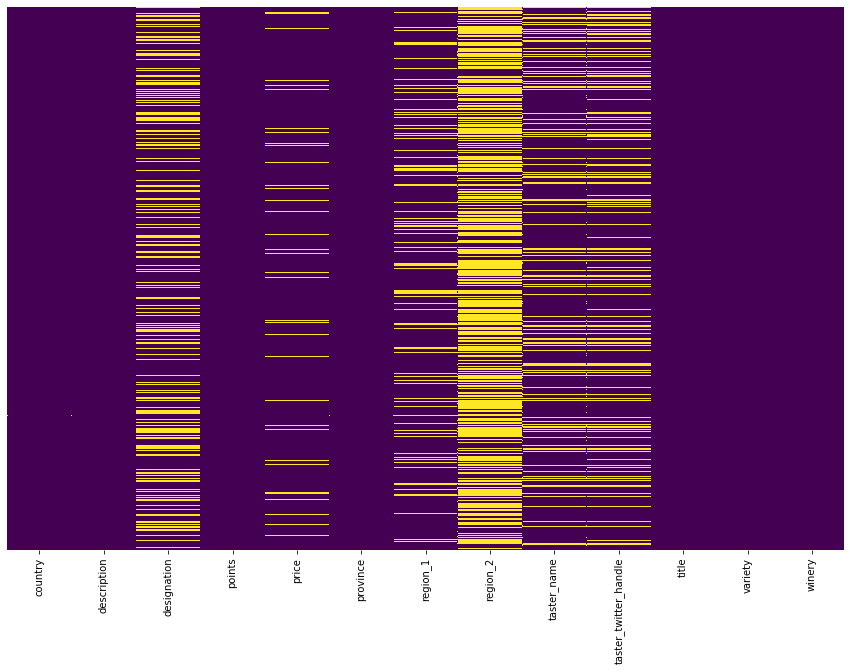

In [270]:
# HEATMAP OF NAN VALUES

plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Through this heatmap, we notice that some of the variables have missing content. 

In [271]:
def get_percent_missing_values_feature(feature):
    '''
    this function returns the percentage of missing value for a specific variable.
    '''
    missing_values = len(df[df[feature].isnull()])
    total_length = len(df[feature])
    print("[Feature '{}'] percentage missing values: {}% ({}/{})\n".format(feature, round(100 * missing_values/total_length,2), missing_values, total_length ))

In [272]:
# PERCENTAGE OF MISSING CONTENT PER VARIABLE

for feature in df.columns:
    get_percent_missing_values_feature(feature)

[Feature 'country'] percentage missing values: 0.05% (63/129971)

[Feature 'description'] percentage missing values: 0.0% (0/129971)

[Feature 'designation'] percentage missing values: 28.83% (37465/129971)

[Feature 'points'] percentage missing values: 0.0% (0/129971)

[Feature 'price'] percentage missing values: 6.92% (8996/129971)

[Feature 'province'] percentage missing values: 0.05% (63/129971)

[Feature 'region_1'] percentage missing values: 16.35% (21247/129971)

[Feature 'region_2'] percentage missing values: 61.14% (79460/129971)

[Feature 'taster_name'] percentage missing values: 20.19% (26244/129971)

[Feature 'taster_twitter_handle'] percentage missing values: 24.02% (31213/129971)

[Feature 'title'] percentage missing values: 0.0% (0/129971)

[Feature 'variety'] percentage missing values: 0.0% (1/129971)

[Feature 'winery'] percentage missing values: 0.0% (0/129971)



We will check later if there is a possibility for the different variables to fill or not the missing content.

### I. 1. Analysis of numerical variables

In [273]:
# DESCRIPTION OF NUMERICAL VARIABLES

df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


- the median price is 25e.
- the median score is 88 / 100.
- it seems some outliers were introduced (max price = 3300 >> third quantile = 42).

Experts seem to be fairly nice to give scores for wines as the minimum value is 80.
The median from 'points' variable will be taken as starting value of a good wine for our analysis.

In [274]:
# LET'S CHECK THE VALUE OF THE 99TH QUANTILE

for feature in num_variables:
    print("99th quantile for {}: {}".format(feature, df[feature].quantile(0.99)))

99th quantile for points: 95.0
99th quantile for price: 155.0


The last 1st Quantile gather all the extremist prices which will be removed from our dataset.

In [275]:
# REMOVING EXTREMIST PRICES

df = df[df["price"] < df["price"].quantile(0.99)] 

Text(0.5, 1.0, "Distribution of 'price' values")

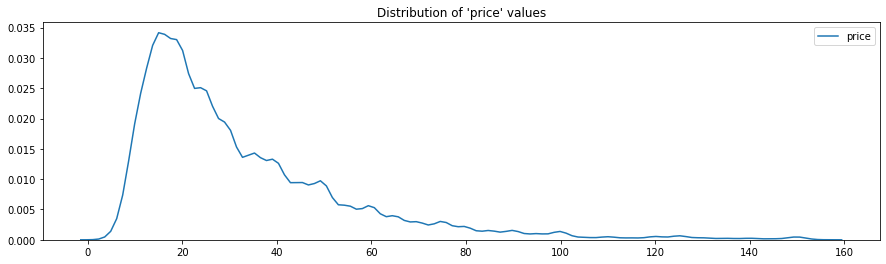

In [276]:
# DISTRIBUTION OF PRICE

plt.figure(figsize=(15,4))
sns.kdeplot(df["price"])
plt.title("Distribution of 'price' values")

In [277]:
# The range of price is from 4 to 150. To see a better visualisation, it would be better to take the log.
df['price_log'] = np.log(df['price'])

Text(0.5, 1.0, "Distribution of 'points' values")

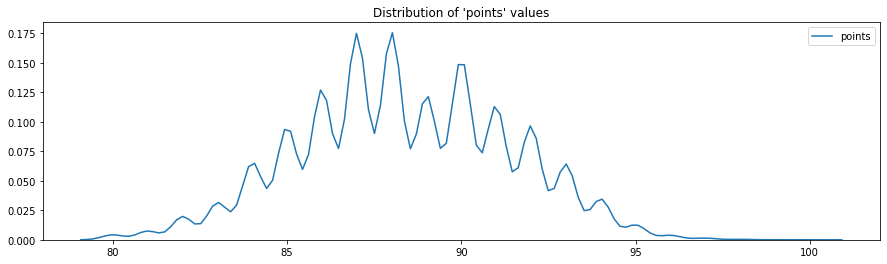

In [278]:
# DISTRIBUTION OF POINTS

plt.figure(figsize=(15,4))
sns.kdeplot(df["points"])
plt.title("Distribution of 'points' values")

The missing values of 'price' will be replaced by its median value.

In [279]:
# REPLACE NAN 'PRICE' VALUES BY ITS MEDIAN

df["price"] = df["price"].fillna(df["price"].median())

### I. 2. Analysis of categorical variables

#### "region_2" and "region_1"

If the info is missing in "region_1" but exists in "region_2", value can be replaced (also true for "region_2").
Only 1 feature will be kept and called "region".

In [280]:
# DATA WITH MISSING VALUES IN 'REGION_1' AND 'REGION_2' (WITHOUT ANY INFO ABOUT REGION).
data_without_region = df[(df["region_1"].isnull() == True) & (df["region_2"].isnull() == True)]

# DATA WITH MISSING VALUES IN 'REGION_1'.
data_without_region_1 = df[df["region_1"].isnull() == True]

# DATA WITH MISSING VALUES IN 'REGION_2'.
data_without_region_2 = df[df["region_2"].isnull() == True]

print("When there is no info about 'region', does it mean 'region_1' has also no info?\nAnswer: {}\n".format(data_without_region.equals(data_without_region_1)))
print("When there is no info about 'region', does it mean 'region_2' has also no info?\nAnswer: {}".format(data_without_region.equals(data_without_region_2)))

When there is no info about 'region', does it mean 'region_1' has also no info?
Answer: True

When there is no info about 'region', does it mean 'region_2' has also no info?
Answer: False


When there is no data in "region_1", "region_2" is also empty (because there is no info about 'region').

Actually, "region_2" provides more information about "region_1" when it is available. As there are too many missing values, "region_2" will be dropped. Keeping "region_1" will be enough.

In [281]:
df = df.drop("region_2", axis=1)
df = df.rename(columns = {"region_1" : "region"})

#### "country"

In [282]:
get_percent_missing_values_feature('country')

[Feature 'country'] percentage missing values: 0.05% (59/119758)



The NAN values can be dropped as the percentage of missing values is very low.

In [283]:
df = df.dropna(subset=['country'])

### II. Answering questions

Let's introduce a variable called 'ratio' which will be useful to evaluate the quality of a wine.
It equals to 'points' divided by 'price'.

In [284]:
# RATIO = POINTS / PRICE
df["ratio"] = df["points"] / df["price"]

### II. 1. What are the countries with the best wine quality in the world?

In [285]:
# GROUPING PER COUNTRY AND TAKING THE MEAN FOR NUMERICAL VALUES
df_groupedby_country = df.groupby('country').mean()

In [286]:
# ADDING THE NUMBER OF ENTRIES PER COUNTRY
df_groupedby_country['entries_counts'] = df.groupby('country').size()

In [287]:
df_groupedby_country.head()

,points,price,price_log,ratio,entries_counts
country,,,,,
Argentina,86.692410,23.878942,2.950933,5.189083,3742
Armenia,87.500000,14.500000,2.673554,6.040476,2
Australia,88.513932,31.322866,3.202561,4.299659,2261
Austria,90.187344,30.334287,3.273133,3.815339,2797
Bosnia and Herzegovina,86.500000,12.500000,2.524928,6.935897,2


we observe that some countries do not have enough entry data. It would be better to remove them as they might have an impact on our statistics analysis.

Let's consider countries which have a number of entries greater than the 20th quantile.

In [288]:
# COUNTRIES WITH MORE THAN THE 20TH QUANTILE OF ENTRIES WILL BE CONSIDERED

df_groupedby_country = df_groupedby_country[df_groupedby_country['entries_counts'] > df_groupedby_country['entries_counts'].quantile(0.20)]

In [289]:
# DESCRIPTION OF THE GROUPEDBY 'COUNTRY' DATAFRAME

df_groupedby_country.describe()

,points,price,price_log,ratio,entries_counts
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,87.673525,26.169680,3.068202,4.754984,3858.935484
std,1.695445,8.380441,0.332794,1.587333,10248.489973
min,83.562500,9.214286,2.192974,1.913598,14.000000
25%,86.977842,21.200155,2.930741,3.814074,70.500000
50%,87.936170,25.450704,3.113666,4.244852,142.000000
75%,88.547894,31.545891,3.283570,5.208710,2529.000000
max,91.550725,51.681159,3.905787,9.671551,53980.000000


In [290]:
# TOP 10 COUNTRIES IN 'POINTS'
top10_points = df_groupedby_country['points'].sort_values(ascending=False)[:10]
top10_points

country
England      91.550725
Austria      90.187344
Germany      89.699903
Canada       89.377953
Hungary      89.049296
France       88.588150
Morocco      88.571429
Italy        88.555163
US           88.540626
Australia    88.513932
Name: points, dtype: float64

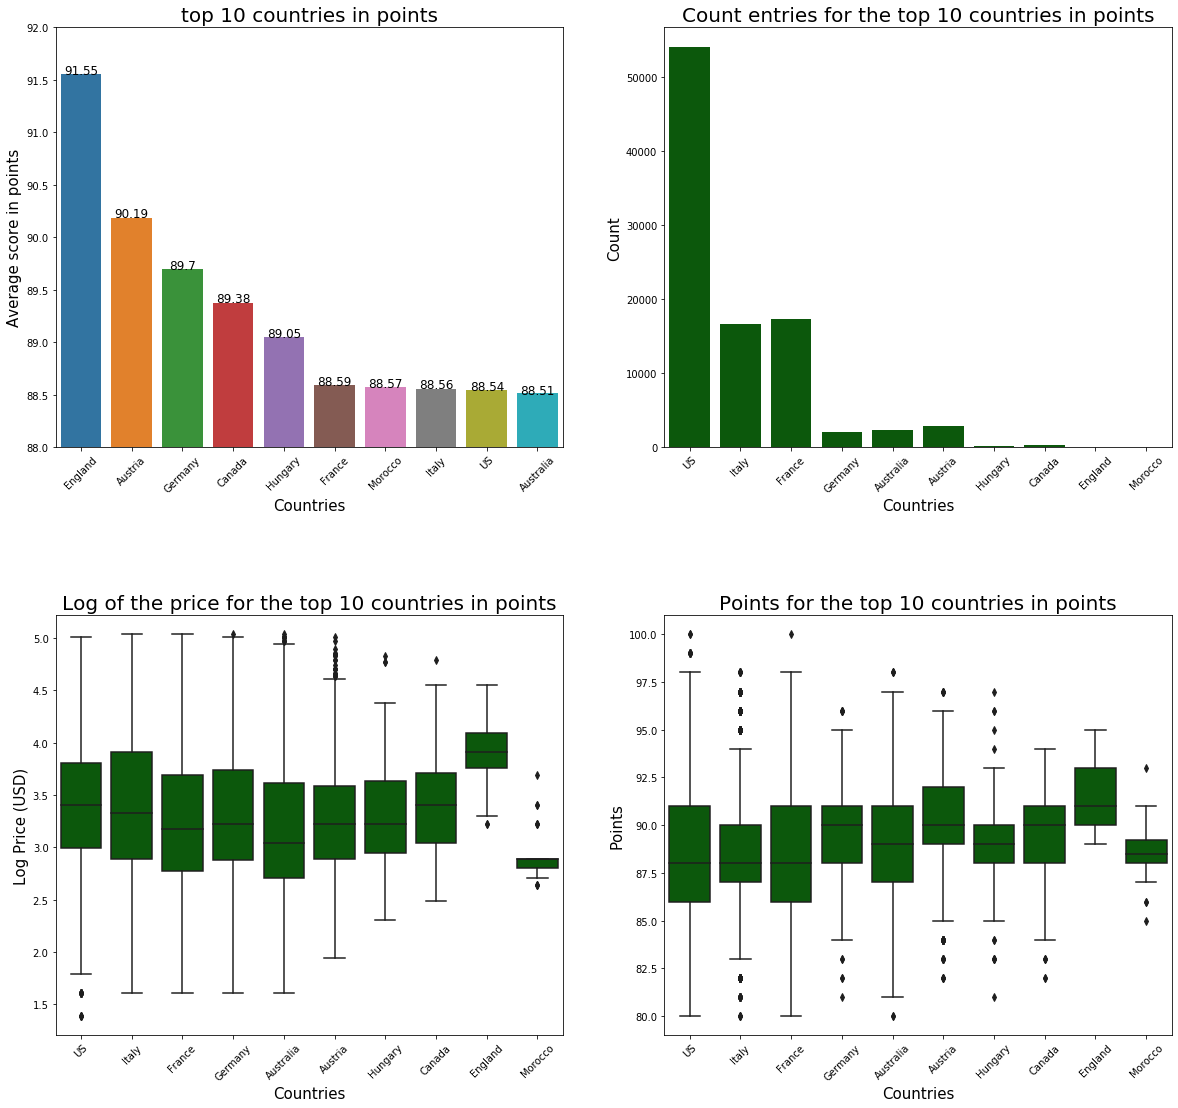

In [291]:
# From the top 10 countries, let's find out the repartition of their wines points & price

fig, axes = plt.subplots(2, 2, figsize=(20,16))

# Figure 0 - barplot top 10 countries in points
g0 = sns.barplot(y=top10_points, x=top10_points.index, ax=axes[0, 0])
g0.set_xlabel('Countries', fontsize = 15)
g0.set_ylabel("Average score in points", fontsize = 15)
g0.set_title("top 10 countries in points", fontsize = 20)
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g0.set_ylim([88,92])

i=0
for average_points in top10_points:
    g0.text(i, round(average_points,2), round(average_points,2), color='black', ha="center", fontsize=12)
    i += 1 

# Figure 1 - countplot wine entries for top10 countries in points
g1 = sns.countplot(x='country', 
                  data=df[df.country.isin(top10_points.index.values)],
                 color='darkgreen', ax=axes[0, 1])
g1.set_title("Count entries for the top 10 countries in points", fontsize=20)
g1.set_xlabel("Countries", fontsize=15)
g1.set_ylabel("Count", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


# Figure 2 - boxplot log_price x top10 countries in points
g2 = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(top10_points.index.values))],
                 color='darkgreen', ax=axes[1, 0])
g2.set_title("Log of the price for the top 10 countries in points", fontsize=20)
g2.set_xlabel("Countries", fontsize=15)
g2.set_ylabel("Log Price (USD)", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

# Figure 3 - boxplot points x top10 countries in points
g3 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(top10_points.index.values)],
                 color='darkgreen', ax=axes[1, 1])
g3.set_title("Points for the top 10 countries in points", fontsize=20)
g3.set_xlabel("Countries", fontsize=15)
g3.set_ylabel("Points", fontsize=15)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.4,top = 1.0)
plt.show()

England seems leading the top 10 countries in 'points'. However, its number of entry is largely less than the other ones, which could biase the results. Due to its high position, it could explain also why the bottles of wines in England, compared to other countries, are expensive.

US is ranked as number one in entries because the database comes from an American website (which also means that most of the reviewers are from US). 

Established countries in the Wine industry such as France, Italy, Germany, Austria show higher standard deviations in the price and in points. It could be explained by the fact these countries offer a large varieties of different wines, from good ones to less good ones (we don't say bad because the minimum in score is 80/100).

### II. 2. Which countries show the best potential for investment in wines?

We are interested in finding the best ratio quality / price for wine.
Let's define a new variable called 'ratio' corresponding to 'points' divided by 'price' ( corresponding to the quality of a wine)

In [292]:
# TOP 10 COUNTRIES IN 'RATIO'
top10_ratio = df_groupedby_country['ratio'].sort_values(ascending=False)[:10]

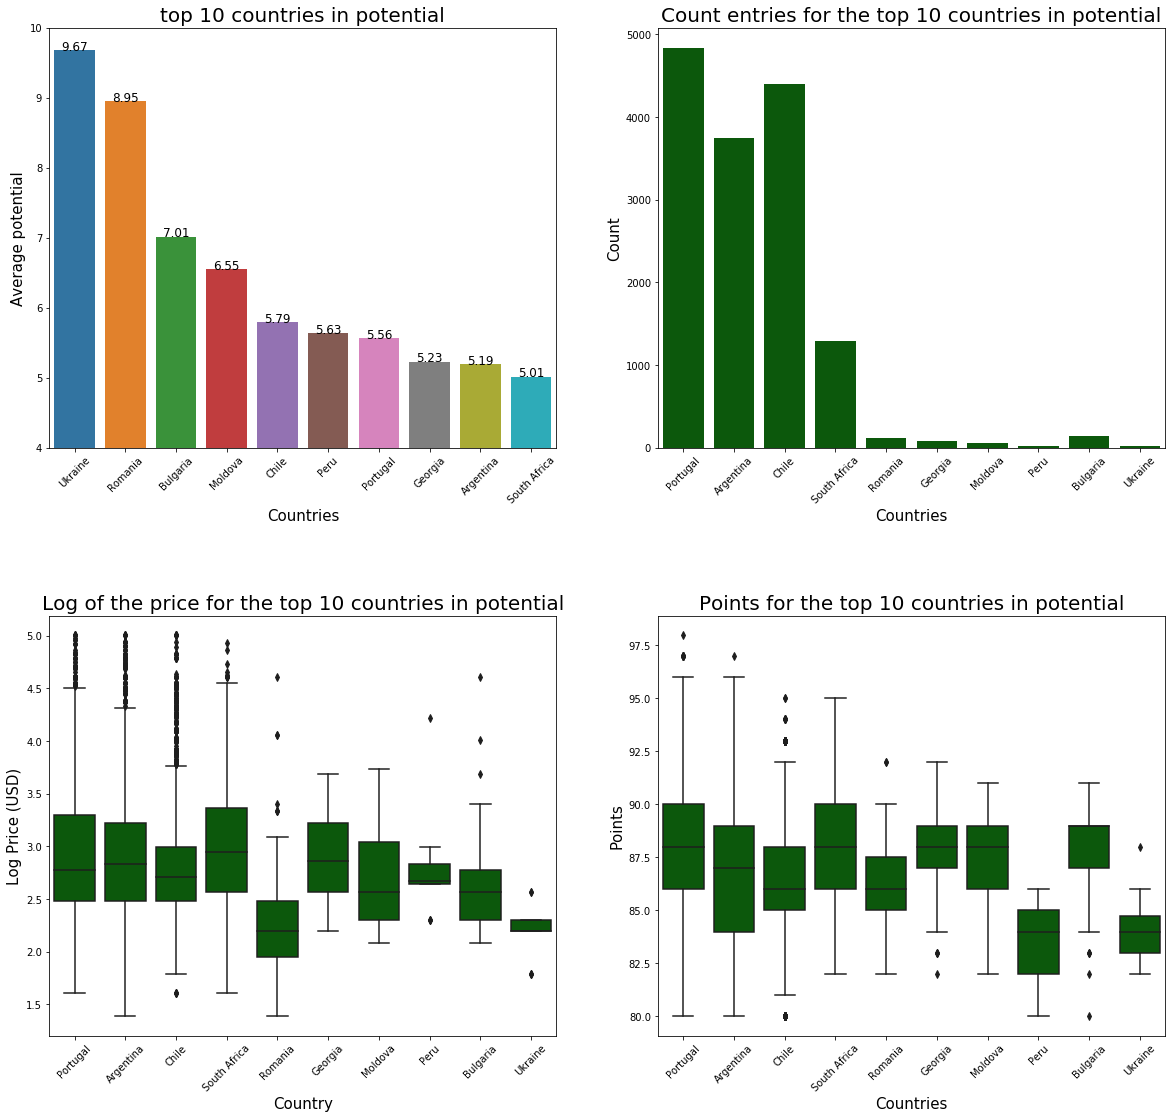

In [293]:
# From the top 10 countries showing potential, let's find out the repartition of their wines points & price

fig, axes = plt.subplots(2, 2, figsize=(20,16))

# Figure 0 - barplot top 10 countries in ratio
g0 = sns.barplot(y=top10_ratio, x=top10_ratio.index, ax=axes[0, 0])
g0.set_xlabel('Countries', fontsize = 15)
g0.set_ylabel("Average potential", fontsize = 15)
g0.set_title("top 10 countries in potential", fontsize = 20)
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g0.set_ylim([4,10])

i=0
for average_ratio in top10_ratio:
    g0.text(i, round(average_ratio,2), round(average_ratio,2), color='black', ha="center", fontsize=12)
    i += 1 

# Figure 1 - countplot wine entries for top10 countries in ratio
g1 = sns.countplot(x='country', 
                  data=df[df.country.isin(top10_ratio.index.values)],
                 color='darkgreen', ax=axes[0, 1])
g1.set_title("Count entries for the top 10 countries in potential", fontsize=20)
g1.set_xlabel("Countries", fontsize=15)
g1.set_ylabel("Count", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)


# Figure 2 - boxplot log_price x top10 countries in ratio
g2 = sns.boxplot(x='country', y='price_log',
                  data=df.loc[(df.country.isin(top10_ratio.index.values))],
                 color='darkgreen', ax=axes[1, 0])
g2.set_title("Log of the price for the top 10 countries in potential", fontsize=20)
g2.set_xlabel("Country", fontsize=15)
g2.set_ylabel("Log Price (USD)", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

# Figure 3 - boxplot points x top10 countries in ratio
g3 = sns.boxplot(x='country', y='points',
                   data=df[df.country.isin(top10_ratio.index.values)],
                 color='darkgreen', ax=axes[1, 1])
g3.set_title("Points for the top 10 countries in potential", fontsize=20)
g3.set_xlabel("Countries", fontsize=15)
g3.set_ylabel("Points", fontsize=15)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.4,top = 1.0)
plt.show()

(82, 92)

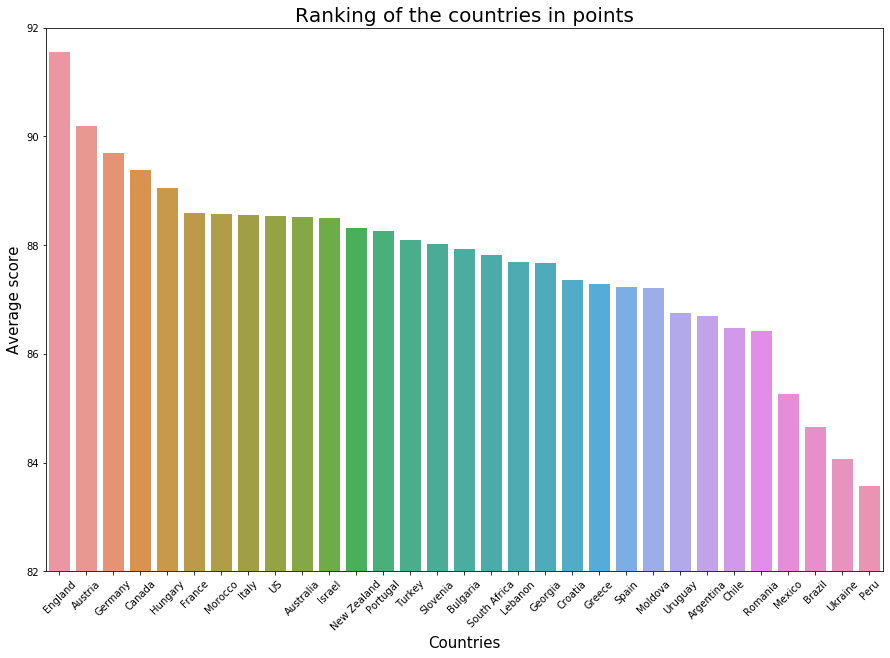

In [294]:
# RANKING OF COUNTRIES BY POINTS
ranking_countries = df_groupedby_country['points'].sort_values(ascending=False)

plt.figure(figsize = (15,10))

# Figure 0 - barplot top 10 countries in ratio
g0 = sns.barplot(y=ranking_countries, x=ranking_countries.index)
g0.set_xlabel('Countries', fontsize = 15)
g0.set_ylabel("Average score", fontsize = 15)
g0.set_title("Ranking of the countries in points", fontsize = 20)
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g0.set_ylim([82,92])

Ukrania seems leading the top 10 potential countries which show the best ratio between 'points' and 'price'.

4 countries from the top 10 belong to balkans countries: Ukraine, Romania, Bulgaria and Moldova.

They seem to show high potential for investors. However: Ukraine, Romania, Moldova are also part of the 10 worst ones in score. Their ratio is high because the price of their bottles is still cheap compared to the rest of the world.

Uktraine, Romania, Bulgaria and Moldova are the cheapest wines country from our database. It confirms what it has been stated previously.

It is interesting to notice that Bulgaria, ranked as 3 from potential countries, doesn't belong to the 10 worst countries in points. However, with few entries in the database compared to Chile or Portugal, it is hard to conclude that it might be the best potential country.

From the whole database, Portugal is ranked 5 and Chile is ranked 6 from the 'entries_counts'. It shows that both countries have a more stable place in the ranking, from 'ratio' but also in 'points'. Unfortunately to Chile, it belongs to the 10 worst countries with a rank 6.
Besides to Bulgaria, Portugal seems showing potential.

Portugal and Bulgaria seem to be promised to a bright future, with a correct ranking in 'points' and a correct price (especially Bulgaria which has very cheap wine).
Portugal is already known to be a good wine, with an already established position in 'entries_counts'.

As the minimum given is 80/100 and the cheapest bottles of wines are in the Balkans, it explains why the 'ratio' of the balkans belong to the top 5.

A question could be raised here: why is the minimum given in points 80/100? On which criteria are the points given?

### II. 3. What should be the average price for a good wine?

First of all, I would expect that there is a correlation between 'points' and 'prices' because the better ranked is a wine, the most expensive it should be. Let's check it.

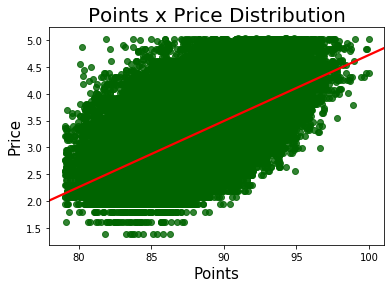

In [295]:
g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribution", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

Even if it seems to be a slight correlation, not all the most expensives wines are the best ranked.

The dataset can be seen in 2 ways:
- in reality, a grade of 80/100 is good. As it is the minimum of our dataset, all wines ranked are then considered as good.
- we consider only the wines above the median value of points.

In [296]:
# FINDING AN AVERAGE PRICE FOR A GOOD WINE (POINTS > MEDIAN)
df_good_wines = df[df['points'] > df['points'].median()]


print("[FILTERED TO POINTS > MEDIAN] The median price of a good wine is: {}".format(df_good_wines['price'].median()))

# FINDING AN AVERAGE PRICE FOR A GOOD WINE (WHOLE DATASET)
print("[WHOLE DATASET] The median price of a good wine is: {}".format(df['price'].median()))

[FILTERED TO POINTS > MEDIAN] The median price of a good wine is: 38.0
[WHOLE DATASET] The median price of a good wine is: 25.0


### II.4. What are the most successful varieties and for which country?

In [304]:
# GROUPING PER VARIETY AND TAKING THE MEAN FOR NUMERICAL VALUES
df_groupby_variety = df.groupby('variety').mean()

In [305]:
# ADDING THE NUMBER OF ENTRIES PER VARIETY
df_groupby_variety['entries_counts'] = df.groupby('variety').size()

In [306]:
df_groupby_variety.head()

,points,price,price_log,ratio,entries_counts
variety,,,,,
Abouriou,87.666667,35.000000,3.244530,4.333333,3
Agiorgitiko,87.031746,23.571429,3.042710,4.598023,63
Aglianico,89.385666,38.406143,3.502479,3.073715,293
Aidani,82.000000,27.000000,3.295837,3.037037,1
Airen,81.666667,9.000000,2.193084,9.154630,3


we observe that some varieties do not have enough entry data. It would be better to remove them as they might have an impact on our statistics analysis.

Let's consider varieties which have a number of entries greater than the 20th quantile.

In [307]:
# VARIETIES WITH MORE THAN THE 20TH QUANTILE OF ENTRIES WILL BE CONSIDERED

df_groupby_variety = df_groupby_variety[df_groupby_variety['entries_counts'] > df_groupedby_country['entries_counts'].quantile(0.20)]

In [308]:
# GETTING BEST COUNTRY FOR THE VARIETY AND ITS SCORE
for variety in df_groupby_variety.index:
    df_variety_groupby_country = df[df['variety'] == variety].groupby('country').mean()['points'].sort_values(ascending=False)
    df_groupby_variety.loc[variety,'best_country'] = df_variety_groupby_country.index[0]
    df_groupby_variety.loc[variety, 'best_country_score'] = df_variety_groupby_country[0]

In [309]:
# TOP 5 VARIETIES
top5_variety = df_groupby_variety['points'].sort_values(ascending=False)[:5]

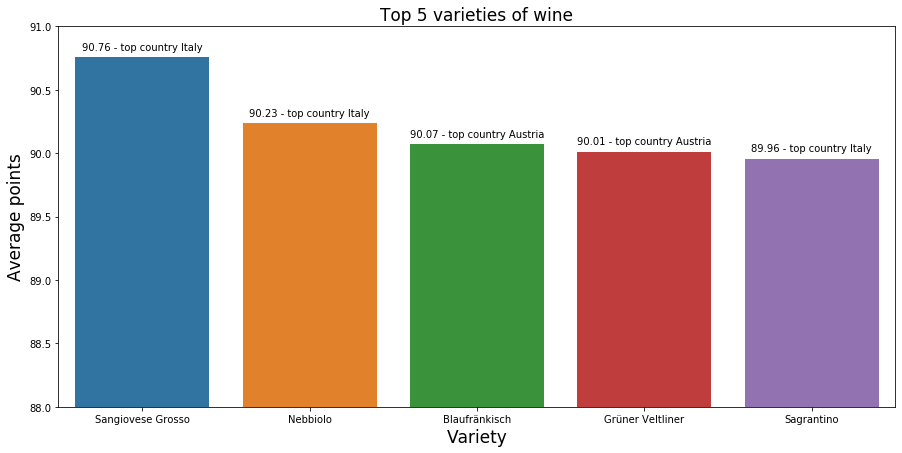

In [359]:
plt.figure(figsize=(15,7))
ax = sns.barplot(y=top5_variety, x=top5_variety.index)
ax.set_xlabel('Variety', size = 17)
ax.set_ylabel("Average points", size = 17)
ax.set_title("Top 5 varieties of wine", size = 17)
ax.set_ylim([88,91])
i=0
for p in ax.patches:
    variety = top5_variety.index[i]
    ax.annotate(str(round(df_groupby_variety.loc[variety, 'points'],2)) + " - top country " + df_groupby_variety.loc[variety, 'best_country'], (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    i += 1

In [374]:
# Defining a dataframe which counts the number of varieties per country

dict_local = {}

for country in df.country.unique():
    dict_local[country] = len(df[df['country'] == country]['variety'].unique())

df_countries_varieties_cnt = pd.DataFrame.from_dict(dict_local, orient='index')
df_countries_varieties_cnt = df_countries_varieties_cnt.rename(columns={0: "varieties_counts"})

df_countries_varieties_cnt_sorted = df_countries_varieties_cnt['varieties_counts'].sort_values(ascending=False)[:20]

From the top 5 varieties of wine which have the best scores, Italy scores in position 1 and 2 as the best country for the corresponding variety.

[Text(0, 0, 'US'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Chile'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'New Zealand'),
 Text(0, 0, 'Slovenia'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Bulgaria')]

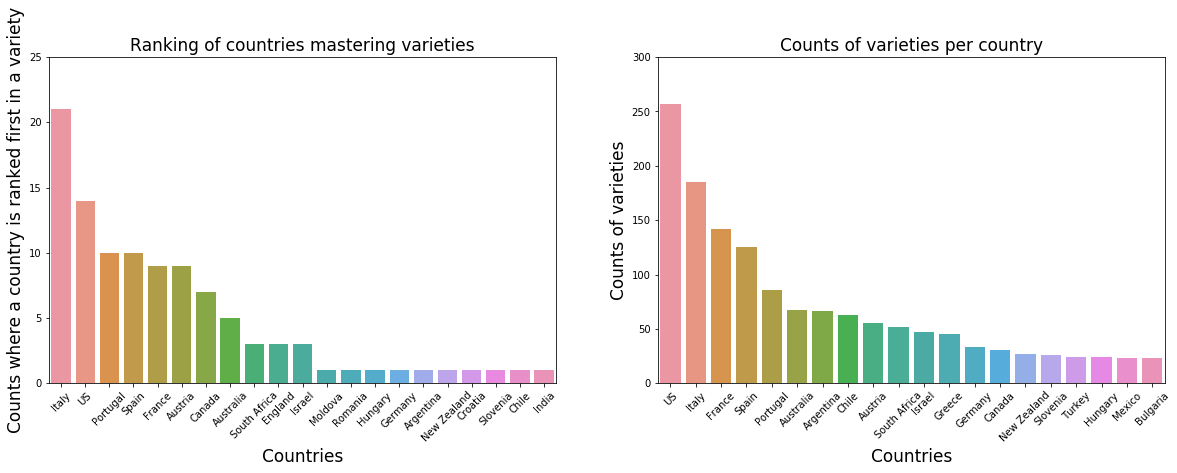

In [380]:
# GET TOP SCORER COUNTRY PER VARIETY
top_scorer_countries = df_groupby_variety['best_country'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(20,6))

# figure 1 - ranking of countries mastering varieties
ax = sns.barplot(y=top_scorer_countries, x=top_scorer_countries.index, ax=axes[0])
ax.set_xlabel('Countries', size = 17)
ax.set_ylabel("Counts where a country is ranked first in a variety", size = 17)
ax.set_title("Ranking of countries mastering varieties", fontsize = 17)
ax.set_ylim([0,25])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# figure 2 - varieties per country
ax = sns.barplot(y=df_countries_varieties_cnt_sorted, x=df_countries_varieties_cnt_sorted.index, ax=axes[1])
ax.set_xlabel('Countries', size = 17)
ax.set_ylabel("Counts of varieties", size = 17)
ax.set_title("Counts of varieties per country", fontsize = 17)
ax.set_ylim([0,300])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Knowing that Italy was not considered in the top 5 of countries for best wines, we can deduce that:
- either Italy might have specific varieties of grapes which do not exist outside from its country. The country has unique wines.
- some of these specific varieties, even if accessible from other countries outside of Italy, might not score good points. Therefore, Italy might have lost some ranks in the ranking of 'points'.

Back to previous answer given to the "potential area" question, we can observer here that Portugal is a top 3 in owning best varieties of grapes (value 10).

Bulgaria didn't develop their best and unique wines yet compared to Portugal. But as they show potential it could be in future. At least, because of their good grades, they have a good earth to plant vineyards. 